<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



project_id = "bigquery-dsi-katerina"

sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
LIMIT 20000
"""

df_review = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 277.3 Mb

Retrieving results...
  Got page: 1; 16.0% done. Elapsed 8.46 s.
  Got page: 2; 32.0% done. Elapsed 13.18 s.
  Got page: 3; 49.0% done. Elapsed 18.27 s.
  Got page: 4; 65.0% done. Elapsed 23.38 s.
  Got page: 5; 81.0% done. Elapsed 27.98 s.
  Got page: 6; 97.0% done. Elapsed 33.79 s.
  Got page: 7; 100.0% done. Elapsed 35.68 s.
Got 20000 rows.

Total time taken 41.89 s.
Finished at 2016-12-19 19:38:28.


In [4]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.businesses] 

"""

df_businesses = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 25.2 Mb

Retrieving results...
  Got page: 1; 21.0% done. Elapsed 11.43 s.
  Got page: 2; 42.0% done. Elapsed 18.07 s.
  Got page: 3; 62.0% done. Elapsed 23.19 s.
  Got page: 4; 83.0% done. Elapsed 29.33 s.
  Got page: 5; 100.0% done. Elapsed 33.85 s.
Got 152832 rows.

Total time taken 39.06 s.
Finished at 2016-12-19 19:39:08.


In [5]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.checkins] 
LIMIT 2500
"""

df_checkins = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 9.8 Mb

Retrieving results...
Got 2500 rows.

Total time taken 1.67 s.
Finished at 2016-12-19 19:39:10.


In [6]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.tips] 
LIMIT 2500
"""

df_tips = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 84.0 Mb

Retrieving results...
Got 2500 rows.

Total time taken 5.56 s.
Finished at 2016-12-19 19:39:16.


In [7]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 

"""

df_users = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 15.2 Mb

Retrieving results...
  Got page: 1; 12.0% done. Elapsed 10.16 s.
  Got page: 2; 23.0% done. Elapsed 14.56 s.
  Got page: 3; 35.0% done. Elapsed 19.39 s.
  Got page: 4; 46.0% done. Elapsed 23.81 s.
  Got page: 5; 58.0% done. Elapsed 29.51 s.
  Got page: 6; 69.0% done. Elapsed 35.52 s.
  Got page: 7; 81.0% done. Elapsed 41.03 s.
  Got page: 8; 92.0% done. Elapsed 45.91 s.
  Got page: 9; 100.0% done. Elapsed 49.38 s.
Got 144206 rows.

Total time taken 57.16 s.
Finished at 2016-12-19 19:40:13.


In [8]:
df_review.head(2)

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,7xHra9hs42cspY6XLTtKaA,Ux_qANUwQ2GkGx6cyrTCDg,10,OdD1GuGNQ64ssJmMJ_D9RQ,8,5,2015-06-10,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cRyNICH0mhjxagvSyVr60Q,RBIre4h0IU7GGECF_IB9fA,7,ZEdaJ8mcMpPiFWgDuSPqeA,8,5,2012-04-02,14,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_review.shape


(20000, 108)

In [10]:
df_review.columns

Index([u'user_id', u'review_id', u'votes_cool', u'business_id', u'votes_funny',
       u'stars', u'date', u'votes_useful', u'minutes_10', u'minutes_15',
       ...
       u'service_great', u'staff_friendly', u'super_friendly', u'sweet_potato',
       u'tasted_like', u'time_vegas', u'try_place', u've_seen', u've_tried',
       u'wait_staff'],
      dtype='object', length=108)

In [11]:
df_businesses.head(2)

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],attributes.Ambience.trendy,False
1,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],hours.Wednesday.close,False


In [12]:
import numpy as np
#From long format to wide format businesses df
business_wide = pd.pivot_table(df_businesses, index=['business_id','city'], columns='variable', 
                               values='value').reset_index()

In [13]:
business_wide.head(20)

variable,business_id,city,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Las Vegas,True,None,None,False,None,None,None,None,...,None,None,None,None,None,None,None,None,None,True
1,-0HGqwlfw3I8nkJyMHxAsQ,Phoenix,True,None,None,False,None,None,None,None,...,None,None,None,None,None,None,None,None,None,True
2,-0VK5Z1BfUHUYq4PoBYNLw,Las Vegas,True,None,None,False,True,False,False,False,...,None,None,None,None,None,None,None,None,None,True
3,-0bUDim5OGuv8R0Qqq6J4A,Phoenix,True,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,False
4,-1bOb2izeJBZjHC7NWxiPA,Phoenix,True,None,None,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,-2_O3_WKgO5In5XO5extNQ,Phoenix,True,None,None,None,None,None,None,None,...,False,False,False,False,False,False,False,False,False,True
6,-2k6VTGx1M93hscEdhx37A,Phoenix,True,None,None,None,None,None,None,None,...,False,False,False,False,False,False,False,False,False,True
7,-3xbryp44xhpN4BohxXDdQ,Phoenix,True,None,None,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,True
8,-4mNZfAXMd2mxEsD2YRcaQ,Las Vegas,True,None,None,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,True
9,-584fn2GxYe9sLsgN2WeQA,Las Vegas,True,None,None,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
business_wide_col = [col for col in business_wide.columns if sum(business_wide[col].isnull()) < 2000]

business_wide = business_wide[business_wide_col]


In [15]:
business_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 51 columns):
business_id                        4132 non-null object
city                               4132 non-null object
attributes.Accepts Credit Cards    3896 non-null object
attributes.Alcohol                 3050 non-null object
attributes.Ambience.casual         2873 non-null object
attributes.Ambience.classy         2873 non-null object
attributes.Ambience.divey          2864 non-null object
attributes.Ambience.hipster        2871 non-null object
attributes.Ambience.intimate       2873 non-null object
attributes.Ambience.romantic       2873 non-null object
attributes.Ambience.touristy       2873 non-null object
attributes.Ambience.trendy         2873 non-null object
attributes.Ambience.upscale        2866 non-null object
attributes.Attire                  2650 non-null object
attributes.Delivery                2777 non-null object
attributes.Good For Groups         3362 non-null obje

In [16]:

business_wide.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
business_wide.rename(columns=lambda x: x.replace('attributes', ''), inplace=True)
business_wide.rename(columns=lambda x: x.replace('.', ''), inplace=True)
business_wide.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

In [17]:
business_wide.columns

Index([         u'business_id',                 u'city',
       u'Accepts_Credit_Cards',              u'Alcohol',
             u'Ambiencecasual',       u'Ambienceclassy',
              u'Ambiencedivey',      u'Ambiencehipster',
           u'Ambienceintimate',     u'Ambienceromantic',
           u'Ambiencetouristy',       u'Ambiencetrendy',
            u'Ambienceupscale',               u'Attire',
                   u'Delivery',      u'Good_For_Groups',
          u'Good_Forbreakfast',       u'Good_Forbrunch',
            u'Good_Fordessert',       u'Good_Fordinner',
          u'Good_Forlatenight',        u'Good_Forlunch',
              u'Good_for_Kids',               u'Has_TV',
                u'Noise_Level',      u'Outdoor_Seating',
              u'Parkinggarage',           u'Parkinglot',
              u'Parkingstreet',         u'Parkingvalet',
           u'Parkingvalidated',          u'Price_Range',
                   u'Take_out',   u'Takes_Reservations',
             u'Waiter_Service',

In [18]:
business_wide.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [19]:
business_wide.drop(['hoursFridayclose','hoursFridayopen', 'hoursMondayclose', 'hoursMondayopen',
                   'hoursSaturdayclose', 'hoursSaturdayopen', 'hoursSundayclose', 'hoursSundayopen', 
                   'hoursThursdayclose', 'hoursThursdayopen', 'hoursTuesdayclose', 'hoursTuesdayopen', 
                   'hoursWednesdayclose', 'hoursWednesdayopen'], axis=1, inplace=True)

In [20]:
business_wide['city'].value_counts()

Las Vegas    721
Phoenix      412
Surprise      24
Waterloo      16
Name: city, dtype: int64

In [21]:
#Dummy code for Vegas (0) and not Vegas (1)
def vegas(x):
    if x == 'Las Vegas':
        return 0
    else:
        return 1
    
business_wide['city'] = business_wide['city'].map(vegas)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [22]:
formula = " ~ "+' + '.join([x for x in business_wide.columns if not x in ['business_id','city']])+' -1'
print formula

 ~ Accepts_Credit_Cards + Alcohol + Ambiencecasual + Ambienceclassy + Ambiencedivey + Ambiencehipster + Ambienceintimate + Ambienceromantic + Ambiencetouristy + Ambiencetrendy + Ambienceupscale + Attire + Delivery + Good_For_Groups + Good_Forbreakfast + Good_Forbrunch + Good_Fordessert + Good_Fordinner + Good_Forlatenight + Good_Forlunch + Good_for_Kids + Has_TV + Noise_Level + Outdoor_Seating + Parkinggarage + Parkinglot + Parkingstreet + Parkingvalet + Parkingvalidated + Price_Range + Take_out + Takes_Reservations + Waiter_Service + Wi_Fi + open -1


In [23]:
#patsy formula to create y and X
import patsy
formula = 'city ~ Accepts_Credit_Cards + Alcohol + Ambiencecasual + Ambienceclassy + Ambiencedivey + Ambiencehipster + Ambienceintimate + Ambienceromantic + Ambiencetouristy + Ambiencetrendy + Ambienceupscale + Attire + Delivery + Good_For_Groups + Good_Forbreakfast + Good_Forbrunch + Good_Fordessert + Good_Fordinner + Good_Forlatenight + Good_Forlunch + Good_for_Kids + Has_TV + Noise_Level + Outdoor_Seating + Parkinggarage + Parkinglot + Parkingstreet + Parkingvalet + Parkingvalidated + Price_Range + Take_out + Takes_Reservations + Waiter_Service + Wi_Fi + open - 1'
y, X = patsy.dmatrices(formula, data=business_wide, return_type='dataframe')



In [24]:
y = np.ravel(y)


In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
#K-neighbors classifier with GridsearchCv
params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)

results = knn_gs.fit(Xn, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.9s finished


In [27]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(knn_gs, Xn, y, cv=20)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)


predictions = cross_val_predict(knn_gs, Xn, y, cv=20)


accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.9s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.4s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.3s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.4s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.3s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.3s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.3s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.4s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


[ 0.56666667  0.57627119  0.69491525  0.6779661   0.57627119  0.55932203
  0.55932203  0.72881356  0.50847458  0.62711864  0.61016949  0.66101695
  0.67241379  0.65517241  0.74137931  0.53448276  0.5862069   0.67241379
  0.63793103  0.65517241]
Cross-validated scores mean: 0.62507500487
Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.3s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.4s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.4s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    3.1s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    3.0s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.4s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    3.1s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s


Cross-Predicted Accuracy: -0.583714850319


[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    2.6s finished


In [28]:
from sklearn.metrics import classification_report
predicted = knn_gs.predict(Xn)
print classification_report(y, predicted)

             precision    recall  f1-score   support

        0.0       0.85      0.96      0.90       721
        1.0       0.92      0.73      0.81       452

avg / total       0.88      0.87      0.87      1173



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted,y)

array([[692, 124],
       [ 29, 328]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14065db50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x135388e10>]], dtype=object)

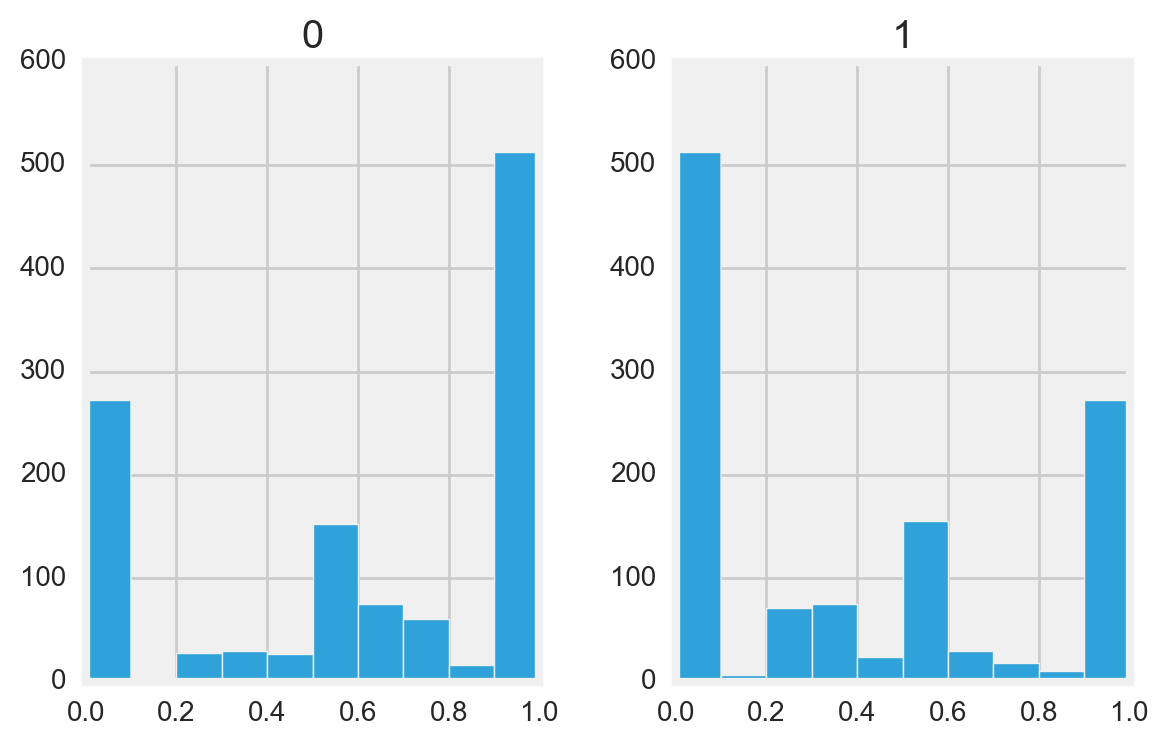

In [30]:
#ditribution of probabilities
probs = pd.DataFrame(knn_gs.predict_proba(Xn))
probs.hist()


In [31]:
from sklearn.metrics import roc_curve, auc

def plot_roc(true_y, predicted_y):

    # Get out the predicted probabilities for the X observation matrix
    # y_pp = knn_gs.predict_proba(Xn)

    # roc_curve returns the false positive rate and true positive rates as the threshold changes
    # takes in the y and the predicted probabilities of the positive class from your model.
    fpr, tpr, _ = roc_curve(true_y, predicted_y)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=[9,9])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic curve', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()

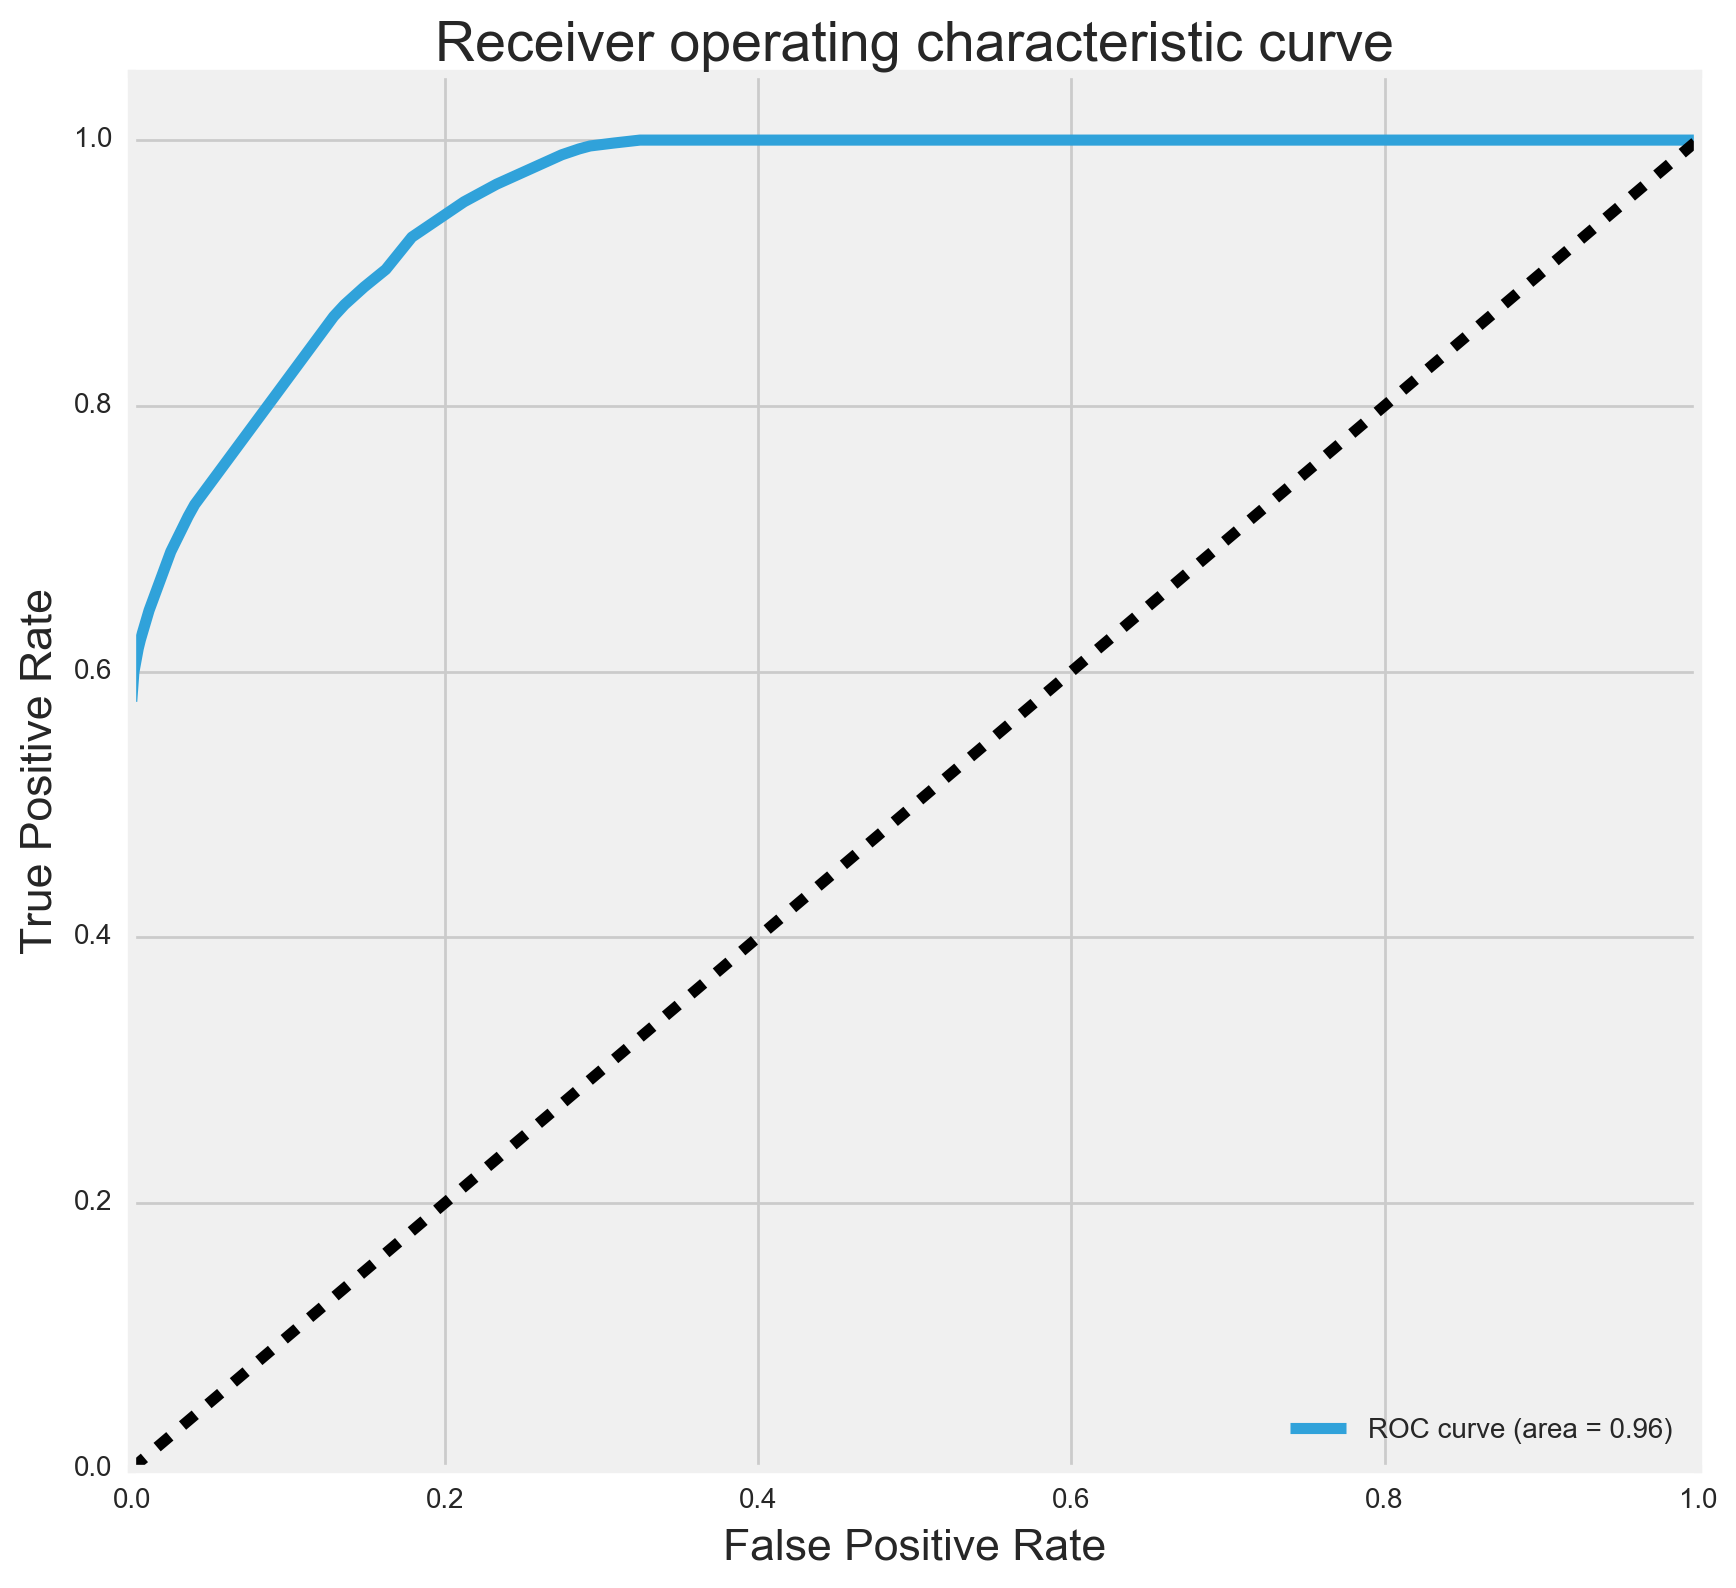

In [32]:
predicted = pd.DataFrame(results.best_estimator_.predict_proba(Xn))
plot_roc(y, predicted[1])

#### Predicting Las Vegas 
The ROC curve shows that the model is very good in predicting Las Vegas. 
In 692 cases the model predicted Las Vegas right and not being Las Vegas 124 times right. There are quite a lot of false 
positives indicating Las Vegas when it is different city. Apparently, all of those used features are good predictors
for Las Vegas. However, the cross-validated accuracy is around -0.5, which is pretty bad, so there might 
be some overfitting

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [33]:
df_review.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [34]:
df_review.head()

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,7xHra9hs42cspY6XLTtKaA,Ux_qANUwQ2GkGx6cyrTCDg,10,OdD1GuGNQ64ssJmMJ_D9RQ,8,5,2015-06-10,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cRyNICH0mhjxagvSyVr60Q,RBIre4h0IU7GGECF_IB9fA,7,ZEdaJ8mcMpPiFWgDuSPqeA,8,5,2012-04-02,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ri0xJJElIs47Tm1xvn1dOA,x5FO76dVzocNbWQjKKH9cA,14,05fTEsjUPVo5jks8PpNKCQ,9,5,2014-07-08,14,0,0,...,0,0,0,0,0,0,0,0,0,0
3,rjlb-7-JcmM6fR64ZpyTug,XiJiax7hBNiOY9xIvO2BSA,10,TgIJfXqEKE-JsD0QUoaC5Q,13,5,2013-08-15,15,0,0,...,0,0,0,0,0,0,0,0,0,0
4,uDVrgAX94cg2qndTSxsRqA,guS82n6mM-40rbcvq72LwQ,11,OoeTGTkxvSZqqicZ8ljJjw,9,5,2015-09-23,15,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
columns = list(df_review.columns.values)
print columns

service_list = []
for rev in columns:
    if 'service' in rev: 
        service_list.append(rev)
    elif 'staff' in rev:
        service_list.append(rev)
    else:
        pass
    
        
print service_list

['user_id', 'review_id', 'votes_cool', 'business_id', 'votes_funny', 'stars', 'date', 'votes_useful', 'minutes_10', 'minutes_15', 'minutes_20', 'minutes_30', 'bar_food', 'beer_selection', 'best_ve', 'bloody_mary', 'bottle_service', 'chicken_waffles', 'customer_service', 'dance_floor', 'decided_try', 'definitely_come', 'definitely_recommend', 'didn_want', 'don_know', 'don_like', 'don_think', 'don_want', 'eggs_benedict', 'fast_food', 'feel_like', 'felt_like', 'fish_chips', 'food_amazing', 'food_came', 'food_delicious', 'food_good', 'food_great', 'food_just', 'food_service', 'french_fries', 'french_toast', 'friday_night', 'fried_chicken', 'friendly_staff', 'good_food', 'good_place', 'good_service', 'good_thing', 'good_time', 'great_atmosphere', 'great_experience', 'great_food', 'great_place', 'great_service', 'great_time', 'happy_hour', 'hash_browns', 'highly_recommend', 'hip_hop', 'ice_cream', 'just_like', 'just_ok', 'just_right', 'las_vegas', 'late_night', 'like_place', 'little_bit', 'l

In [36]:
columns = list(df_review.columns.values)


predictor_list = []
for rev in columns:
    if 'good' in rev or 'beer_selection' in rev: 
        predictor_list.append(rev)
    elif 'great' in rev or 'definitely' in rev:
        predictor_list.append(rev)
    elif 'recommend' in rev:
        predictor_list.append(rev)
    elif 'friendly' in rev or 'quality' in rev:
        predictor_list.append(rev)
    elif 'amazing' in rev or 'love' in rev:
        predictor_list.append(rev)
    else:
        pass
    
        
print predictor_list

['beer_selection', 'definitely_come', 'definitely_recommend', 'food_amazing', 'food_good', 'food_great', 'friendly_staff', 'good_food', 'good_place', 'good_service', 'good_thing', 'good_time', 'great_atmosphere', 'great_experience', 'great_food', 'great_place', 'great_service', 'great_time', 'highly_recommend', 'love_place', 'place_good', 'place_great', 'pretty_good', 'quality_food', 'really_good', 'recommend_place', 'service_friendly', 'service_good', 'service_great', 'staff_friendly', 'super_friendly']


In [37]:
columns = list(df_review.columns.values)


non_service_list_a = []
for rev in columns:
    if 'service' in rev: 
        pass
    elif 'staff' in rev:
        pass
    else:
        non_service_list_a.append(rev)
    
        
print non_service_list_a

['user_id', 'review_id', 'votes_cool', 'business_id', 'votes_funny', 'stars', 'date', 'votes_useful', 'minutes_10', 'minutes_15', 'minutes_20', 'minutes_30', 'bar_food', 'beer_selection', 'best_ve', 'bloody_mary', 'chicken_waffles', 'dance_floor', 'decided_try', 'definitely_come', 'definitely_recommend', 'didn_want', 'don_know', 'don_like', 'don_think', 'don_want', 'eggs_benedict', 'fast_food', 'feel_like', 'felt_like', 'fish_chips', 'food_amazing', 'food_came', 'food_delicious', 'food_good', 'food_great', 'food_just', 'french_fries', 'french_toast', 'friday_night', 'fried_chicken', 'good_food', 'good_place', 'good_thing', 'good_time', 'great_atmosphere', 'great_experience', 'great_food', 'great_place', 'great_time', 'happy_hour', 'hash_browns', 'highly_recommend', 'hip_hop', 'ice_cream', 'just_like', 'just_ok', 'just_right', 'las_vegas', 'late_night', 'like_place', 'little_bit', 'long_time', 'looked_like', 'looks_like', 'love_place', 'mac_cheese', 'make_sure', 'mashed_potatoes', 'medi

In [38]:
non_service_list = non_service_list_a[12:]


In [39]:
service_list_plus = ['user_id', 'review_id', 'votes_cool', 'business_id', 'votes_funny', 'stars', 'date', 'votes_useful','bottle_service', 'customer_service', 'food_service', 'friendly_staff', 'good_service', 'great_service', 'service_excellent', 'service_food', 'service_friendly', 'service_good', 'service_great', 'staff_friendly', 'wait_staff']

In [40]:

df_review['service_sum'] = df_review[service_list].sum(axis=1, skipna=True, numeric_only=True)


In [41]:
df_review.service_sum.value_counts()

0    16476
1     2933
2      521
3       59
4        8
5        3
Name: service_sum, dtype: int64

### Creating service oriented dataframe:

In [42]:
service = df_review[df_review['service_sum'] > 0]

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


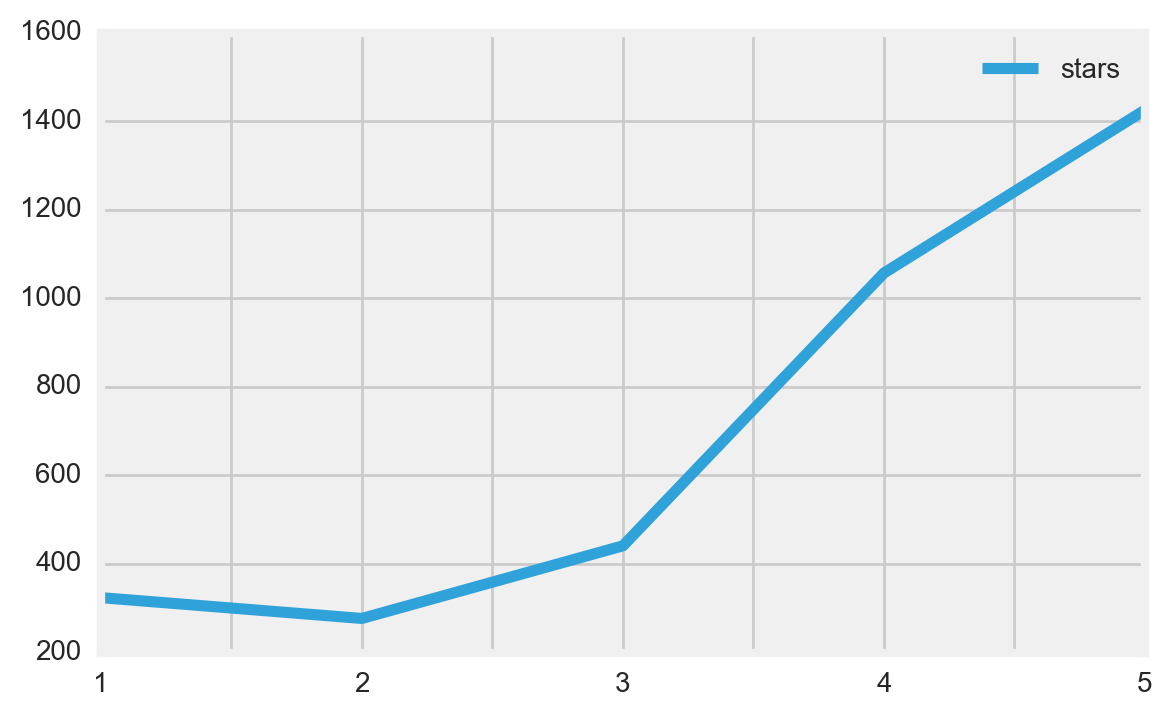

In [43]:
service_stars = pd.DataFrame(service.stars.value_counts())
service_stars.sort().plot()

In [44]:
service_stars.sort()

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,stars
1,324
2,277
3,441
4,1057
5,1425


### Creating non-service oriented dataframe:

In [45]:
non_service = df_review[df_review['service_sum'] == 0]

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


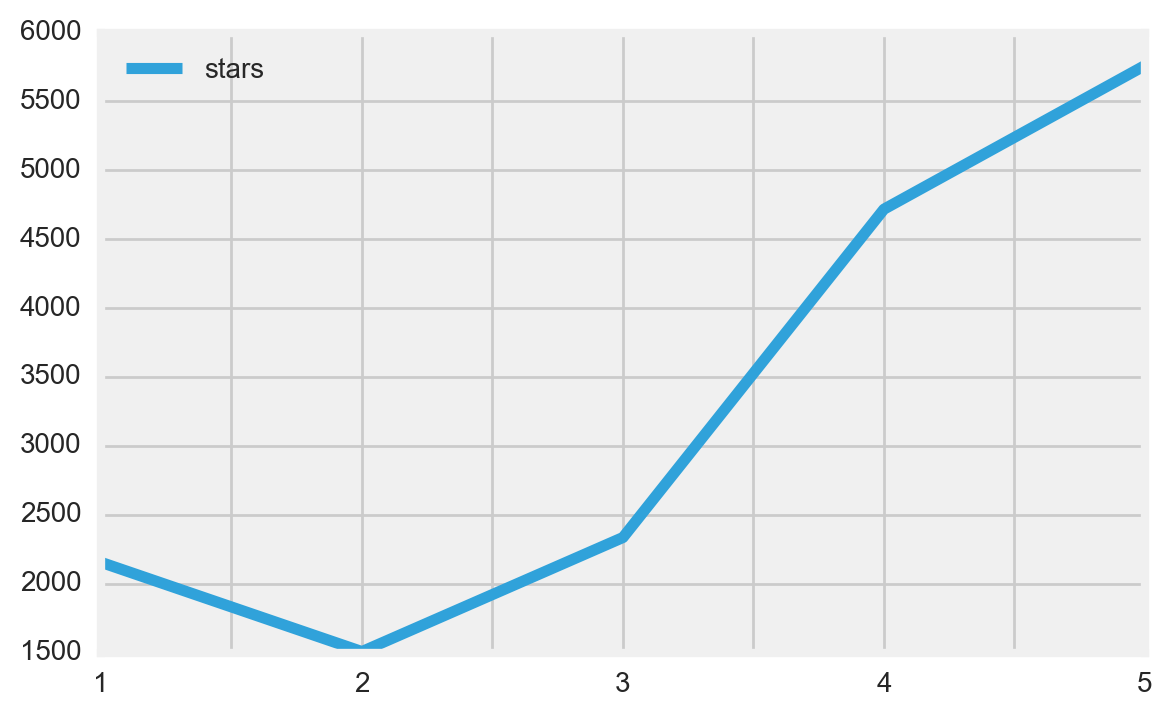

In [46]:
non_service_stars = pd.DataFrame(non_service.stars.value_counts())
non_service_stars.sort().plot()

In [47]:
non_service_stars.sort()

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,stars
1,2155
2,1507
3,2335
4,4718
5,5761


Service and non_service reviews have the same stars distributions. The least given are 2 stars and the most given are
5 stars.

In [48]:

non_service_ratings = ['beer_selection', 'best_ve', 'bloody_mary', 'chicken_waffles', 'dance_floor', 'decided_try', 'definitely_come', 'definitely_recommend', 'eggs_benedict', 'fast_food', 'feel_like', 'felt_like', 'fish_chips', 'food_amazing', 'food_came', 'food_delicious', 'food_good', 'food_great', 'french_fries', 'french_toast', 'friday_night', 'fried_chicken', 'good_food', 'good_place', 'good_thing', 'good_time', 'great_atmosphere', 'great_experience', 'great_food', 'great_place', 'great_time', 'happy_hour', 'hash_browns', 'highly_recommend', 'hip_hop', 'ice_cream', 'just_like', 'just_ok', 'just_right', 'las_vegas', 'late_night', 'like_place', 'little_bit', 'looked_like', 'looks_like', 'love_place', 'mac_cheese', 'mashed_potatoes', 'medium_rare', 'minutes_later', 'new_york', 'onion_rings', 'place_good', 'place_great', 'potato_fries', 'pretty_good', 'quality_food', 'really_enjoyed', 'really_good', 'really_like', 'really_nice', 'recommend_place', 'red_velvet', 'right_away', 'saturday_night', 'second_time', 'super_friendly', 'sweet_potato', 'tasted_like', 'time_vegas', 'try_place']

In [49]:
non_service['ratings_sum'] = non_service[non_service_ratings].sum(axis=1, skipna=True, numeric_only=True)

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
non_service.ratings_sum.value_counts()

0     7671
1     4785
2     2255
3      965
4      433
5      184
6       98
7       43
8       20
9       13
10       6
12       2
11       1
Name: ratings_sum, dtype: int64

### New ratings for non-service oriented review according to wording:

In [51]:
# New ratings according to wording in reviews.

def rating(x):
    if x == 0 or x == 1 or x == 2:
        return 0
    else:
        return 1
    
non_service['new_rating'] = non_service['ratings_sum'].map(rating)

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
non_service['new_rating'].value_counts()

0    14711
1     1765
Name: new_rating, dtype: int64

In [53]:
service['ratings_sum'] = service[service_list].sum(axis=1, skipna=True, numeric_only=True)

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
service.ratings_sum.value_counts()

1    2933
2     521
3      59
4       8
5       3
Name: ratings_sum, dtype: int64

### New ratings for service oriented review according to wording:

In [55]:
# New ratings for service oriented review according to wording.

def rate(x):
    if x == 1:
        return 0
    else:
        return 1
        
service['new_rating'] = service['ratings_sum'].map(rate)

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
service['new_rating'].value_counts()

0    2933
1     591
Name: new_rating, dtype: int64

### Building a logistic regression for service oriented reviews:

In [57]:
X = service[predictor_list]
y = service['new_rating']

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.6s


{'penalty': 'l2', 'C': 0.0001, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.6s finished


In [60]:
lr_gs.score(Xn, y)

0.89245175936435872

In [61]:
logreg = LogisticRegression()
logreg.fit(Xn, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
print 'Logreg coef(s):', logreg.coef_

Logreg coef(s): [[ 0.00146843  0.06164539  0.00728638 -0.01181113  0.10017407 -0.05776008
   0.23968878  0.02706579 -0.00219021  0.60114554  0.06352461 -0.04343051
   0.02565035 -0.029935    0.03765046 -0.06022567  0.68189422  0.08467951
   0.03188543  0.01302418  0.01598286  0.04642914 -0.08524389  0.04331269
  -0.04803359  0.01303553  0.36111059  0.5701353   0.73877368  0.41787447
   0.01002119]]


In [88]:
scores = cross_val_score(lr_gs, Xn, y, cv=10)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)


predictions = cross_val_predict(lr_gs, Xn, y, cv=10)


accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.1s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.1s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.4s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.9s finished


[ 0.81617647  0.81617647  0.81617647  0.81617647  0.81617647  0.80147059
  0.81617647  0.81617647  0.81617647  0.81617647]
Cross-validated scores mean: 0.814705882353
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.7s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    9.6s


Cross-Predicted Accuracy: -0.235027027027


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.5s finished


### Building a logistic regression for non-service oriented reviews:

In [90]:
X = non_service[predictor_list]
y = non_service['new_rating']

In [91]:
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [92]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   19.7s


{'penalty': 'l1', 'C': 20.408261224489795, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   22.1s finished


In [66]:
lr_gs.score(Xn, y)

0.91156834183054136

In [67]:
logreg = LogisticRegression()
logreg.fit(Xn, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
print 'Logreg coef(s):', logreg.coef_

Logreg coef(s): [[ 0.14094598  0.13913084  0.12404323  0.10186994  0.21680389  0.16620301
   0.          0.19182525  0.14811728  0.          0.18029808  0.24023005
   0.110669    0.11796862  0.18504848  0.19662269  0.          0.18646791
   0.19413512  0.2207652   0.1485504   0.1663268   0.38254714  0.10170366
   0.3759382   0.16424902  0.          0.          0.          0.
   0.15228204]]


In [93]:
scores = cross_val_score(lr_gs, Xn, y, cv=10)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)


predictions = cross_val_predict(lr_gs, Xn, y, cv=10)


accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   19.4s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   21.4s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   20.4s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   22.2s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.8s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.9s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.7s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   17.2s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   19.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   17.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.7s finished


[ 0.90357793  0.91140777  0.90351942  0.91322816  0.91262136  0.91074681
  0.91074681  0.91621129  0.91196114  0.90528233]
Cross-validated scores mean: 0.909930301606
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   16.4s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.4s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.2s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.6s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.4s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.4s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   16.9s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.7s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   19.3s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   21.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   18.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   20.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   18.3s


Cross-Predicted Accuracy: 0.0583299040263


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   20.0s finished


Some of the service oriented coefficients are smaller as they have values below zero, however some of them are higher.
There are more 0 coefficients in the non-service oriented review model.
In this we can see that the used words (their unit increase) have different effects on log odds of being rated good - 1 or bad - 0.
In this we can conclude that the ratings differ.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [69]:
df_users.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

df_users.shape

(4080, 21)

In [70]:
def count_elite(x):
    #Counts the number of years when user was elite
    return len(x.split())
    


df_users['elite_counts'] = df_users['elite'].map(count_elite)

In [71]:
elite = df_users.elite_counts.unique()
print elite

[ 1  2  3  4  5  6  7 11 10  8  9]


In [72]:
def years(x):
    #calculates how many years user has been yelping
    years = x.split('-')
    year = int(years[0])
    return (2016 - year)

df_users['yelping_years'] = df_users['yelping_since'].map(years)

In [73]:
df_users['elite_counts'].value_counts()

4     681
3     638
5     588
6     546
2     477
1     443
7     344
8     201
9     112
10     39
11     11
Name: elite_counts, dtype: int64

In [74]:
#new column to estimate which users are elite most often (if yelping long time and being elite this long time)
#according to this column I will create a new binary column for being elite or not. If 0 - 5 in difference,
#the user is elite and if 6 - 10 in difference column then user is not elite. 
df_users['difference'] = df_users['yelping_years'] - df_users['elite_counts']

In [75]:
df_users.difference.value_counts()

1     787
2     648
0     491
3     470
5     467
4     467
6     336
7     230
8     125
9      52
10      7
Name: difference, dtype: int64

In [76]:
df_users['elite_binary'] = df_users['difference'].map(lambda x: 1 if x <= 5 else 0) 

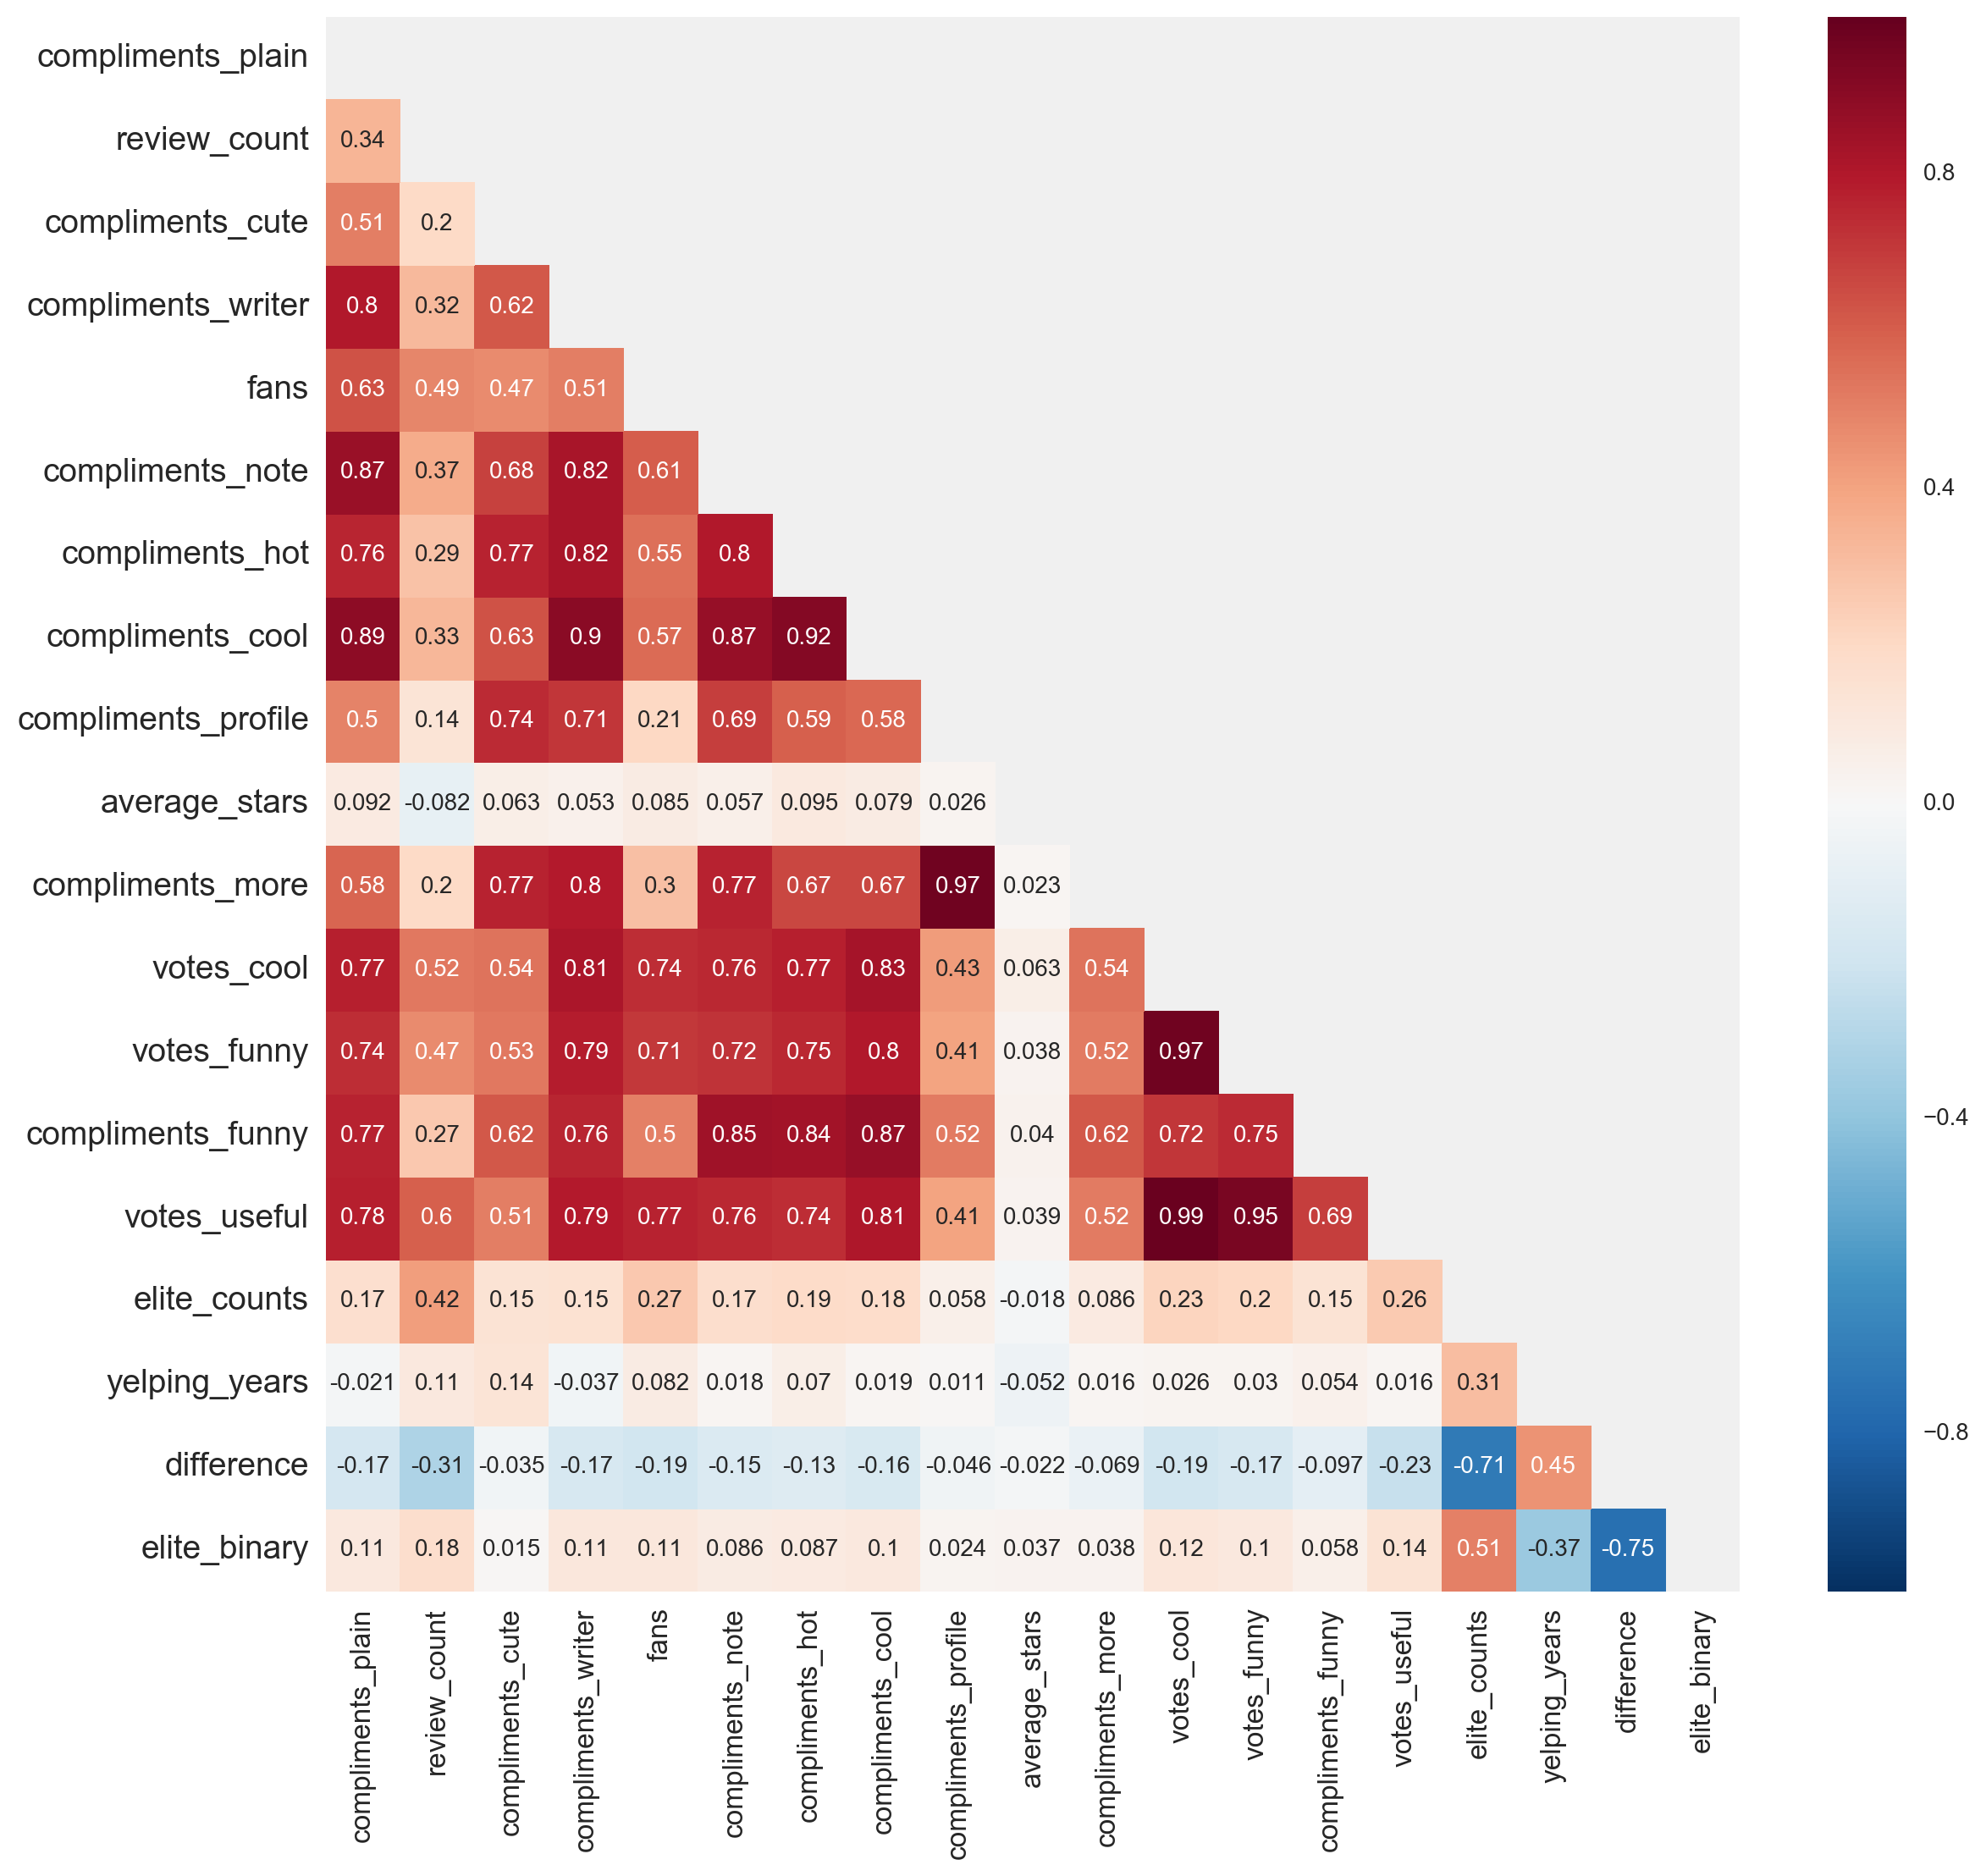

In [77]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

correlation_heat_map(df_users)

According to the correlation heat map I can estimate that vote_cool, votes_useful, fans, and especially 
review_count will be good predictors for elite users.

In [94]:
X = df_users[['votes_cool', 'votes_useful', 'fans', 'review_count']]
y = df_users['elite_binary']
          

In [95]:

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
#K-neighbors classifier with GridsearchCv
params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)

results = knn_gs.fit(Xn, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.9s finished


In [81]:
from sklearn.metrics import classification_report
predicted = knn_gs.predict(Xn)
print classification_report(y, predicted)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       750
          1       1.00      1.00      1.00      3330

avg / total       1.00      1.00      1.00      4080



In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted,y)

array([[ 750,    0],
       [   0, 3330]])

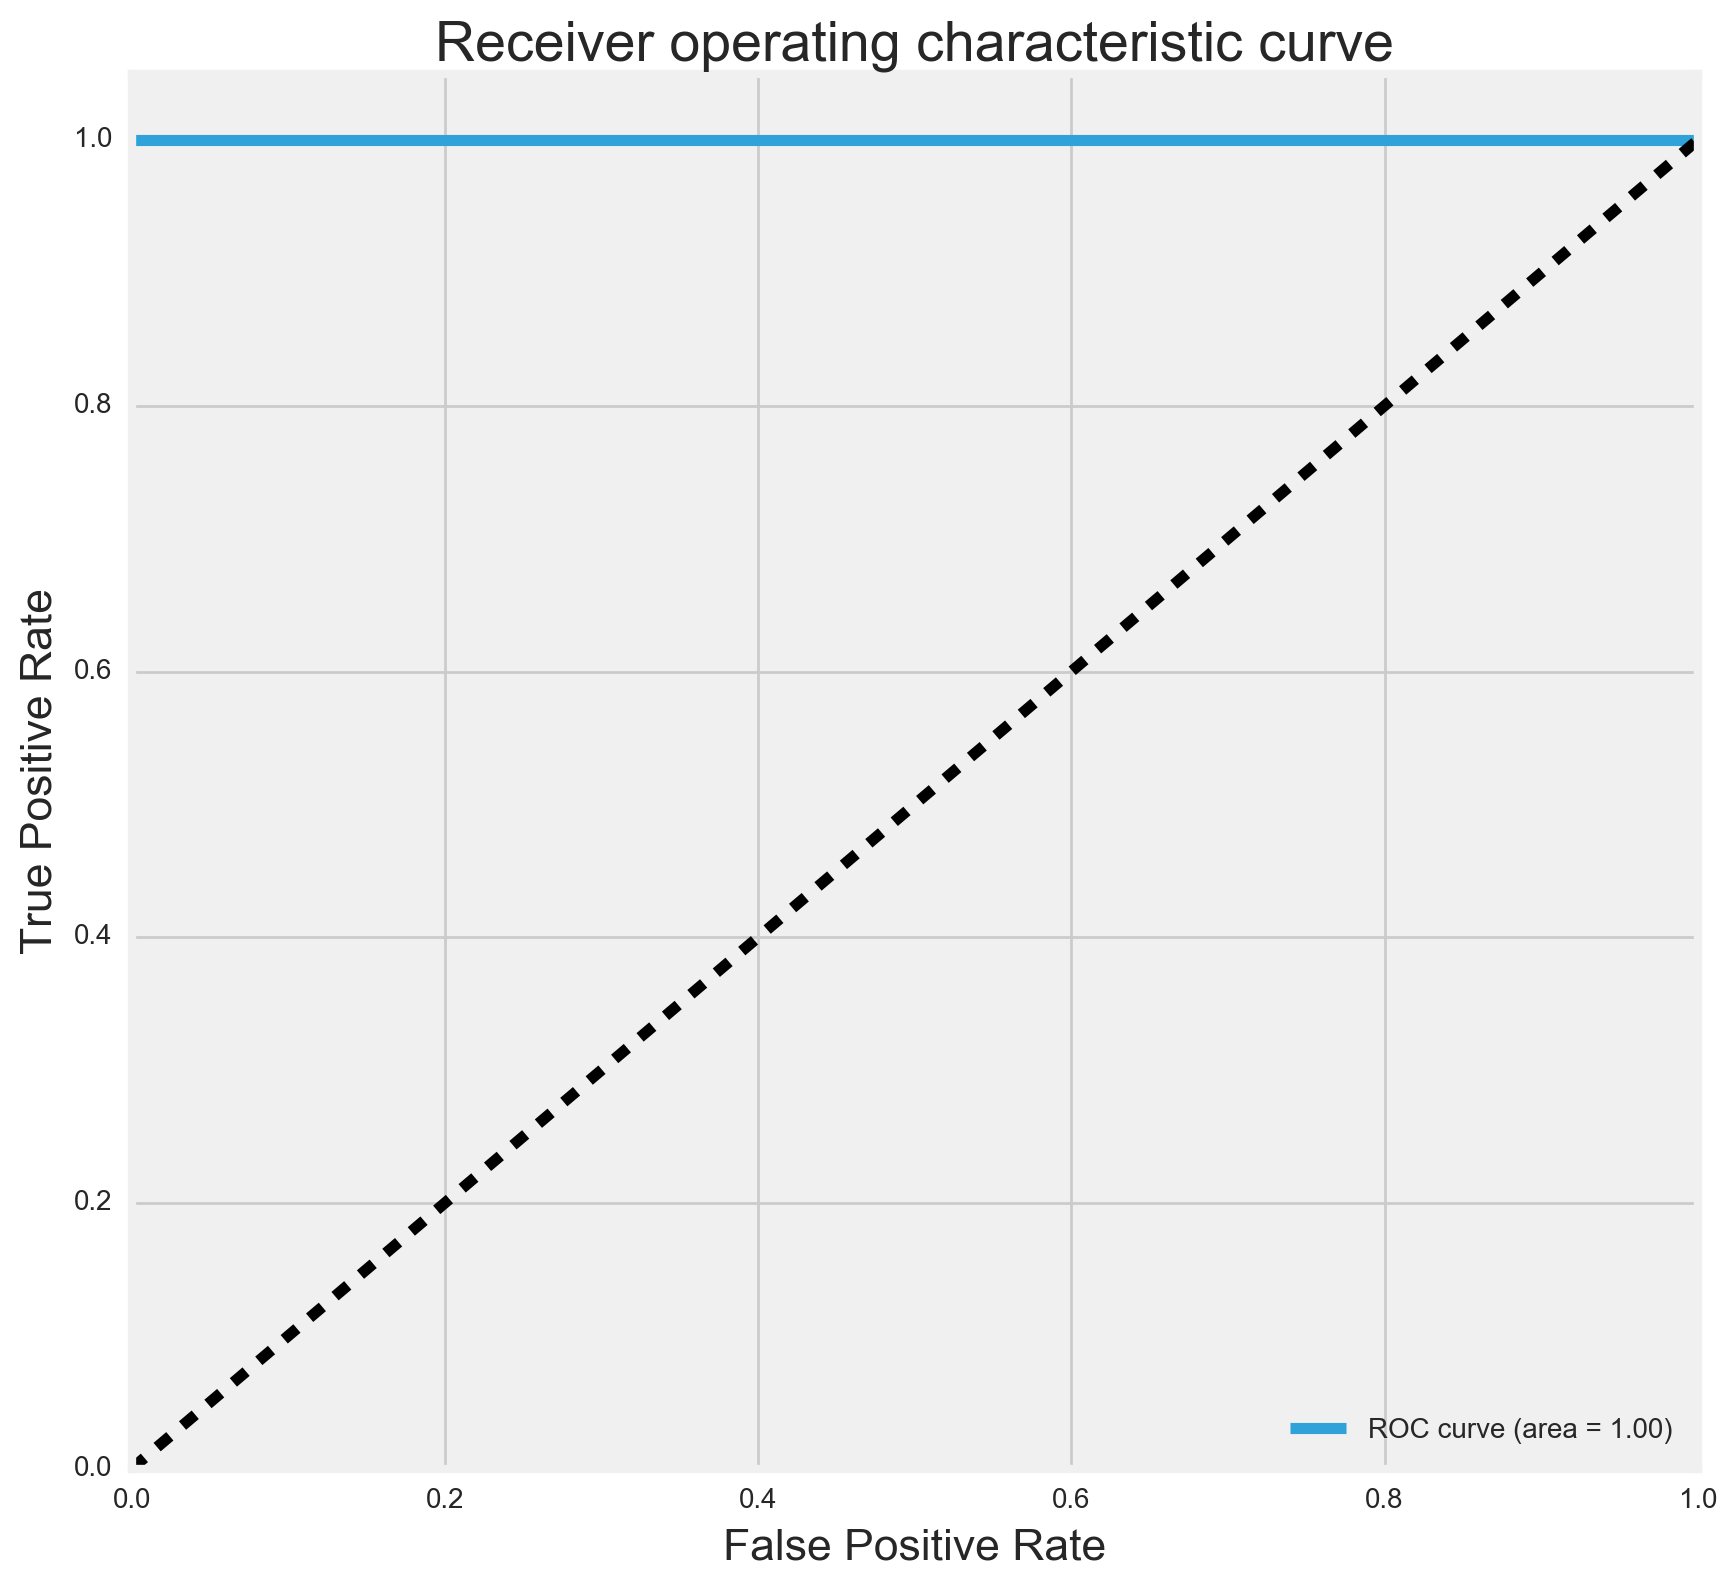

In [83]:
predicted = pd.DataFrame(results.best_estimator_.predict_proba(Xn))
plot_roc(y, predicted[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134c74dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121faf490>]], dtype=object)

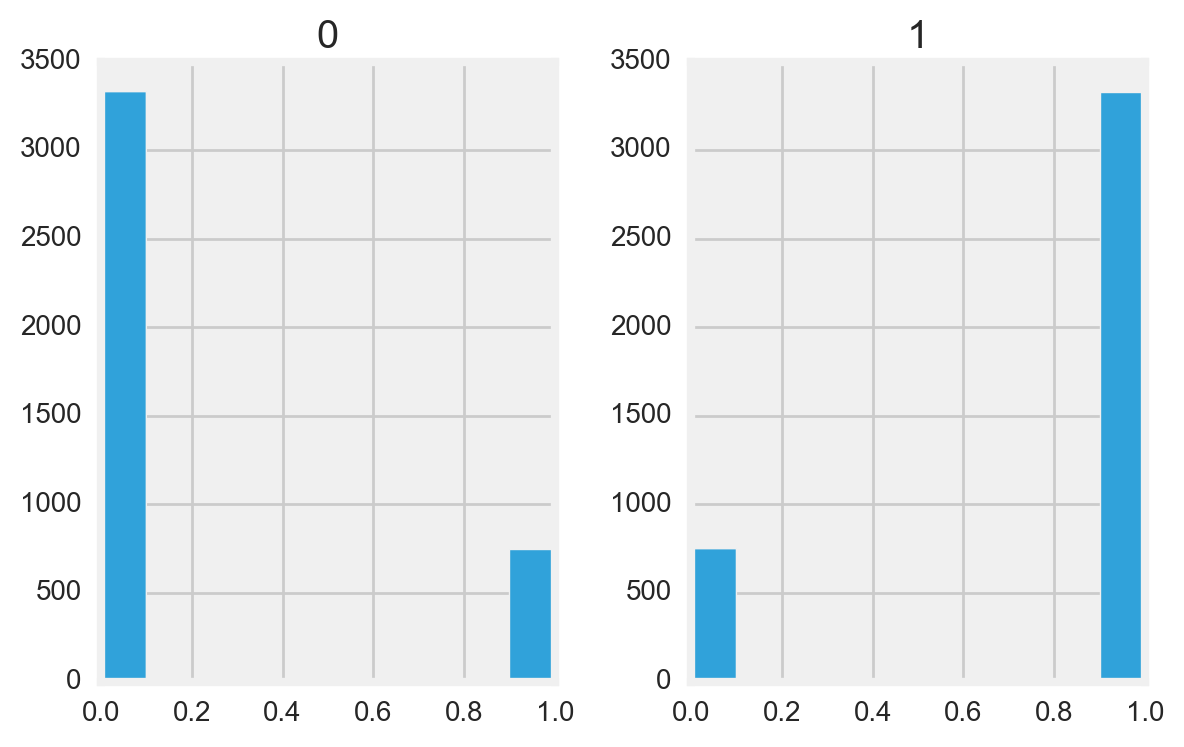

In [84]:
#ditribution of probabilities
probs = pd.DataFrame(knn_gs.predict_proba(Xn))
probs.hist()


The model seems to be perfect predictor of elite users, however, I believe there is an overfitting mistake because the 
correlations are not that strong. The validates scores are probably going to be pretty bad.
I will try another model using logistic regression just with fans feature.

In [97]:
scores = cross_val_score(knn_gs, Xn, y, cv=5)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)


predictions = cross_val_predict(knn_gs, Xn, y, cv=5)


accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.5s finished


[ 0.7879902   0.79534314  0.82230392  0.82352941  0.8370098 ]
Cross-validated scores mean: 0.813235294118
Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.5s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s


Cross-Predicted Accuracy: -0.244828828829


[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.5s finished


The validated accuracy is around -0.24, so it not accurate at all.

In [98]:
Xu = df_users[['fans']].values
y = df_users['elite_binary'].values

In [99]:

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xu, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.4s


{'penalty': 'l1', 'C': 0.0001, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished


In [100]:
cv_indices = StratifiedKFold(y, n_folds=5)

logreg = LogisticRegression()

lr_scores = []


for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xu[train_inds, :], y[train_inds]
    Xte, yte = Xu[test_inds, :], y[test_inds]
    
    
    logreg.fit(Xtr, ytr)
    lr_scores.append(logreg.score(Xte, yte))
    

print 'Logistic Regression:'
print lr_scores
print np.mean(lr_scores)

print 'Baseline accuracy:', np.mean(y)

Logistic Regression:
[0.81617647058823528, 0.81617647058823528, 0.81617647058823528, 0.81617647058823528, 0.81617647058823528]
0.816176470588
Baseline accuracy: 0.816176470588


The linear regression accuracy score is also pretty high and that is quite suspicious. I will plot that.

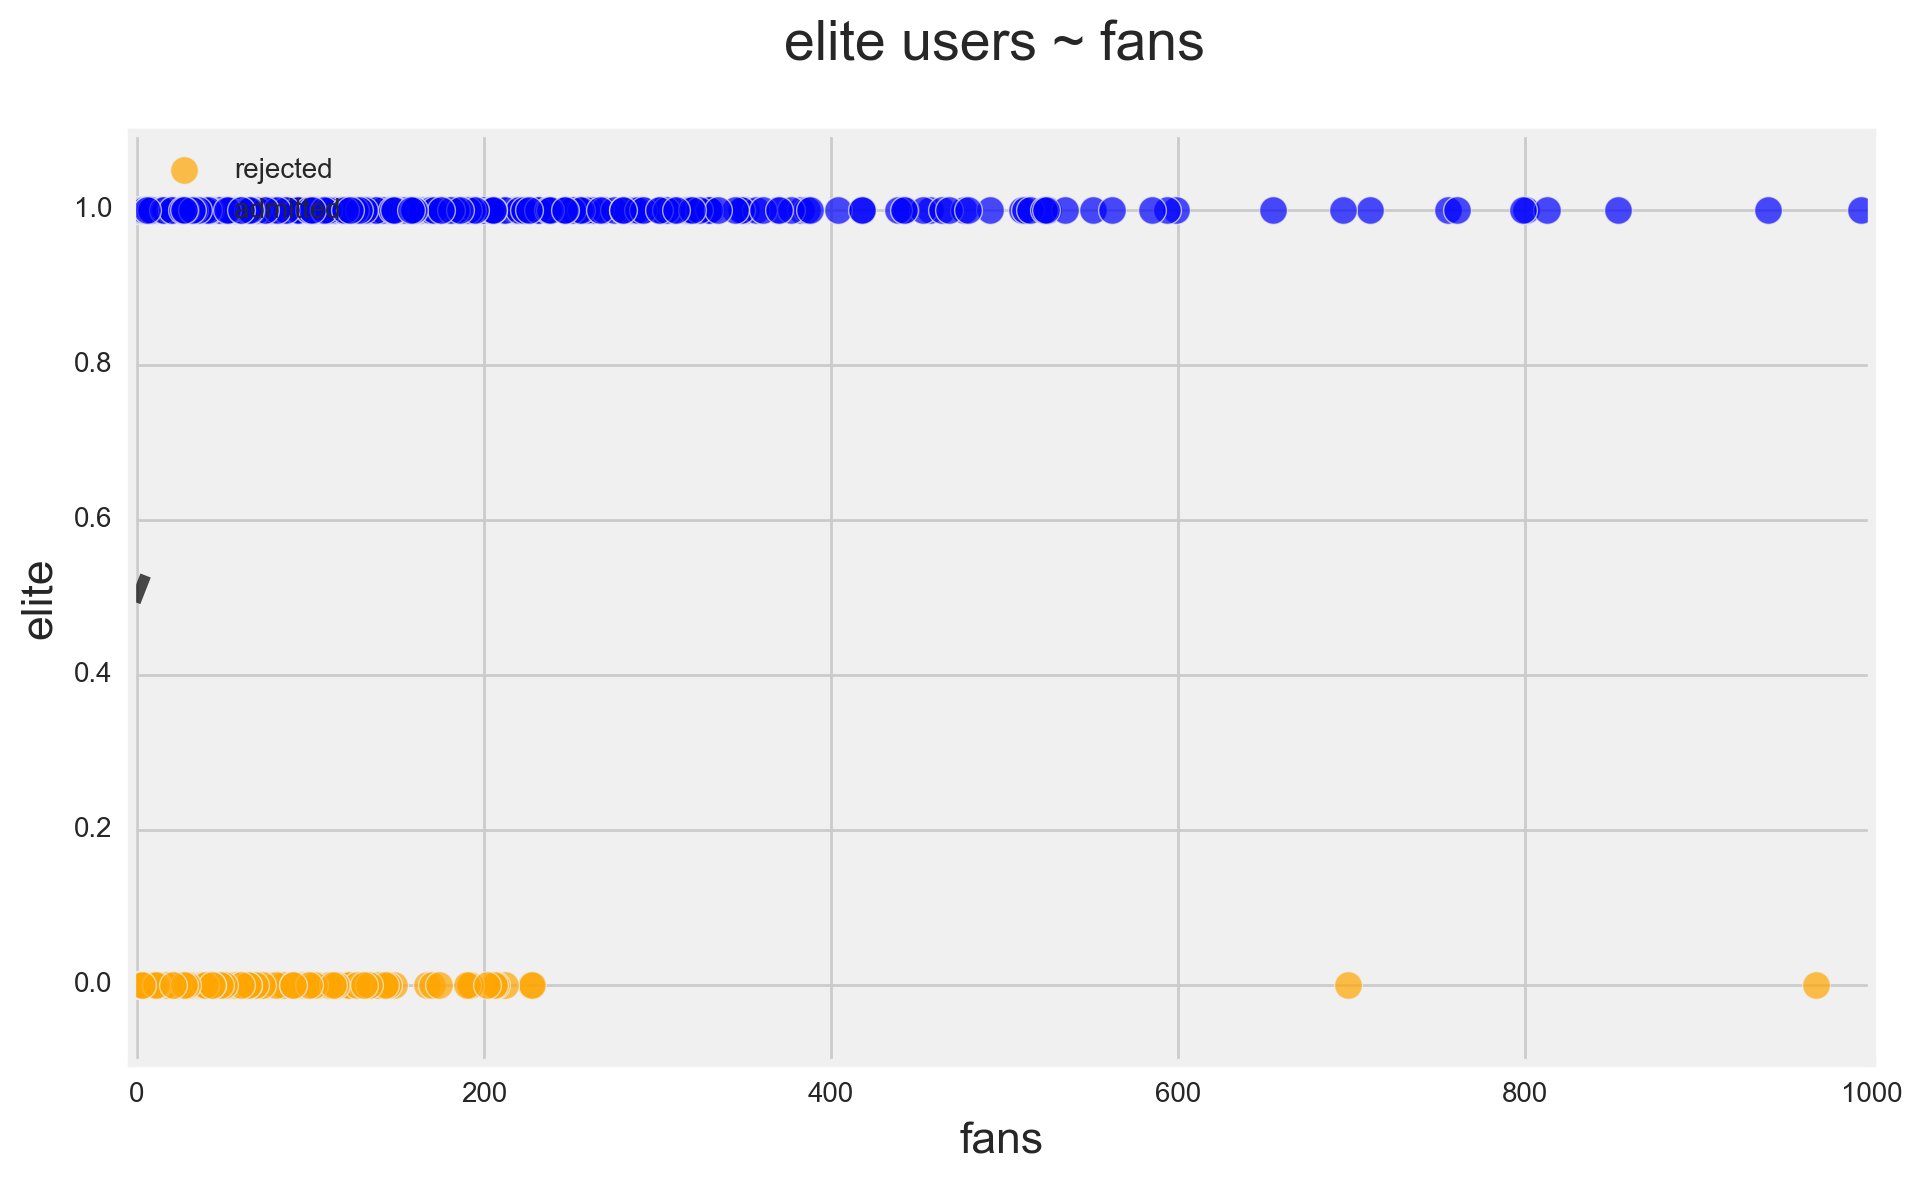

In [101]:


fig, ax = plt.subplots(figsize=(10,6))

# plot the logreg regression line for elite users
x_vals = np.linspace(-1.,5.,300)
y_pp = lr_gs.predict_proba(x_vals[:, np.newaxis])[:,1]

ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

# do one scatter plot for each elite or not elite user:
ax.scatter(df_users.fans[df_users.elite_binary == 0],
           df_users.elite_binary[df_users.elite_binary == 0],
           c=['orange'], s=100, alpha=0.7,
           label='rejected')

ax.scatter(df_users.fans[df_users.elite_binary == 1],
           df_users.elite_binary[df_users.elite_binary == 1],
           c=['blue'], s=100, alpha=0.7,
           label='admitted')


ax.set_ylabel('elite', fontsize=16)
ax.set_xlabel('fans', fontsize=16)
ax.set_title('elite users ~ fans \n', fontsize=20)

ax.set_xlim([-3. ,1000.])
ax.set_ylim([-0.1, 1.1])

plt.legend(loc='upper left')
plt.show()

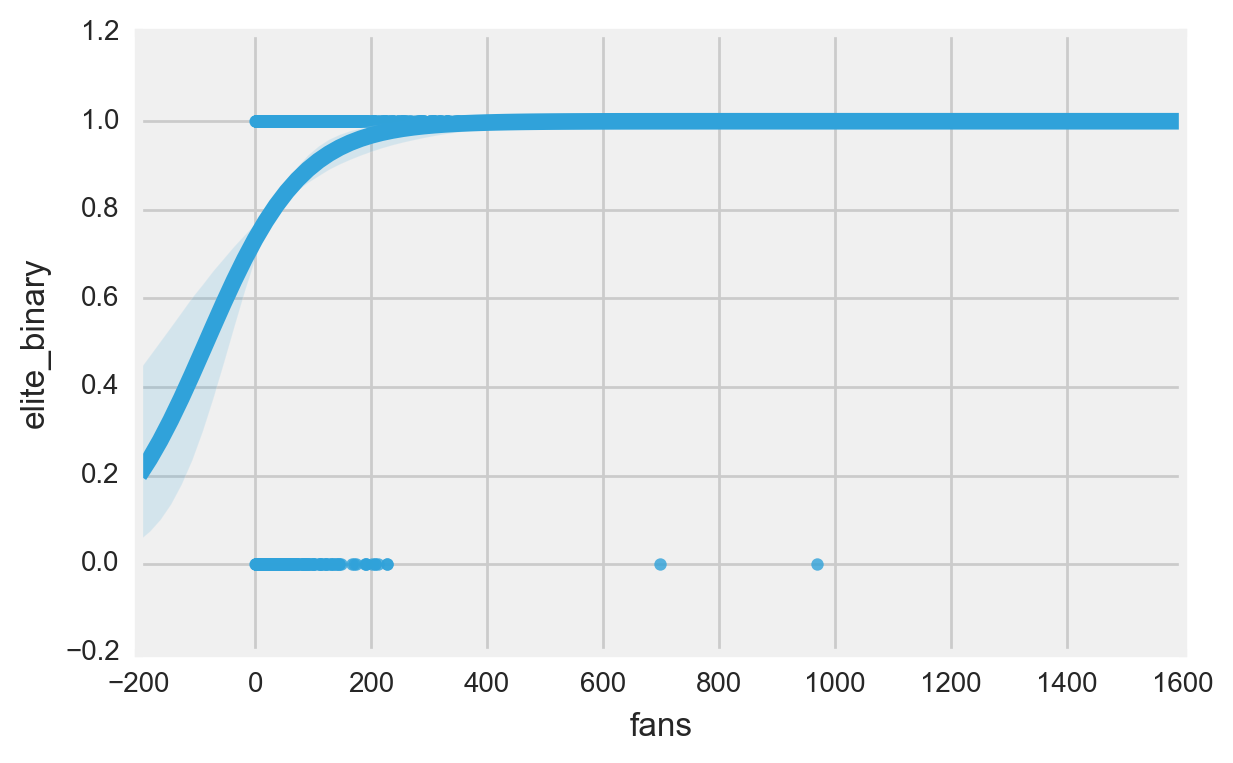

In [102]:
sns.regplot(df_users['fans'], df_users['elite_binary'], scatter=True, fit_reg=True, 
                n_boot=1000, units=None, order=1, logistic=True)

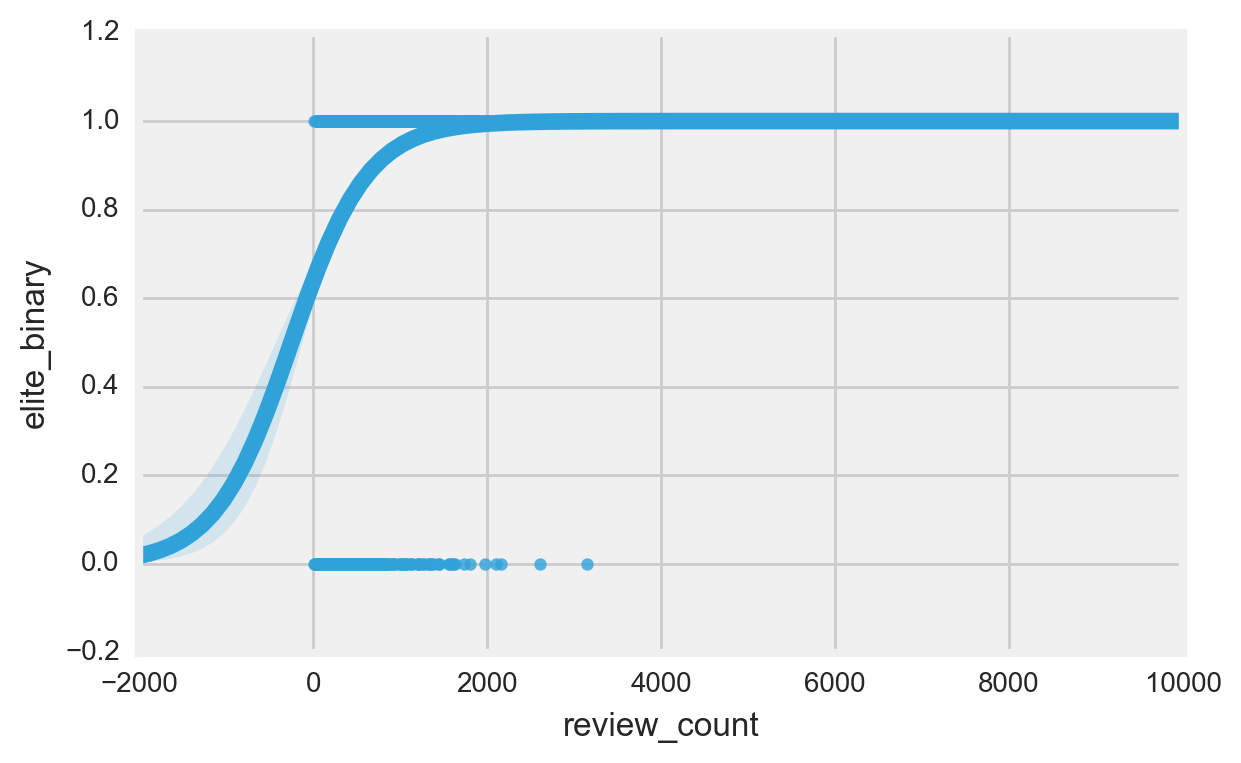

In [103]:
sns.regplot(df_users['review_count'], df_users['elite_binary'], scatter=True, fit_reg=True, 
                n_boot=1000, units=None, order=1, logistic=True)

It looks like my models are overfitted and they do not tell us much about elitness. I think the main reason is my
elite_binary selection at first place, looks like I would need different method to binarize elite and not elite users.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?